In [ ]:
### may need to install
# pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 5.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd

file_path = "Pratical_2_Tracking.xlsx" 
sheets_dict = pd.read_excel(file_path, sheet_name=None)

# Combine all sheets into one DataFrame
combined_df = pd.concat(sheets_dict.values(), ignore_index=True)
df = combined_df.iloc[:, :12]

# calculate memory change column
df['memory_effect'] = df['Memory Before (MiB)'] - df['Memory After (MiB)']
print(df.columns)



Index(['Tokens', 'Overlap Size', 'Vector Database', 'Embedding Model',
       'AI Model', 'Pre-Proccessed?', 'Prompt', 'Response', 'Time (ms)',
       'Memory Before (MiB)', 'Memory After (MiB)', 'Response Quality/Notes',
       'memory_effect'],
      dtype='object')


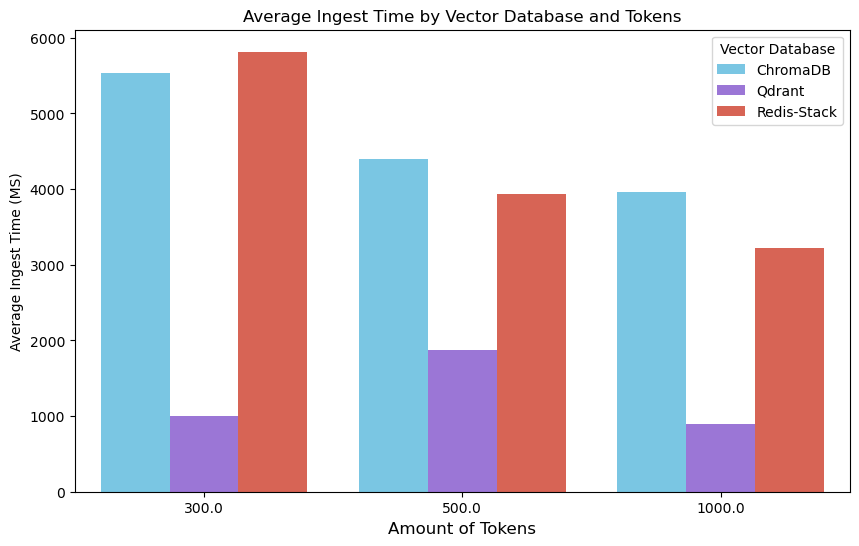

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# group df by vector database and token. Take the average of ingest time
df_avg_runtime = df.groupby(['Vector Database', 'Tokens'], as_index=False)['Time (ms)'].mean()

# make custom palette
custom_palette = {
    'ChromaDB': '#69cef4',  #
    'Qdrant': '#9766e6',    
    'Redis-Stack': '#ed543f' 
}

# plot figure
plt.figure(figsize=(10, 6))
sns.barplot(data=df_avg_runtime, x='Tokens', y='Time (ms)', hue='Vector Database', palette=custom_palette)

plt.title('The Effect that Ingesting has on Memory')
plt.xlabel('Amount of Tokens', fontsize=12)
plt.ylabel('Average Ingest Time (MS)')

plt.show()

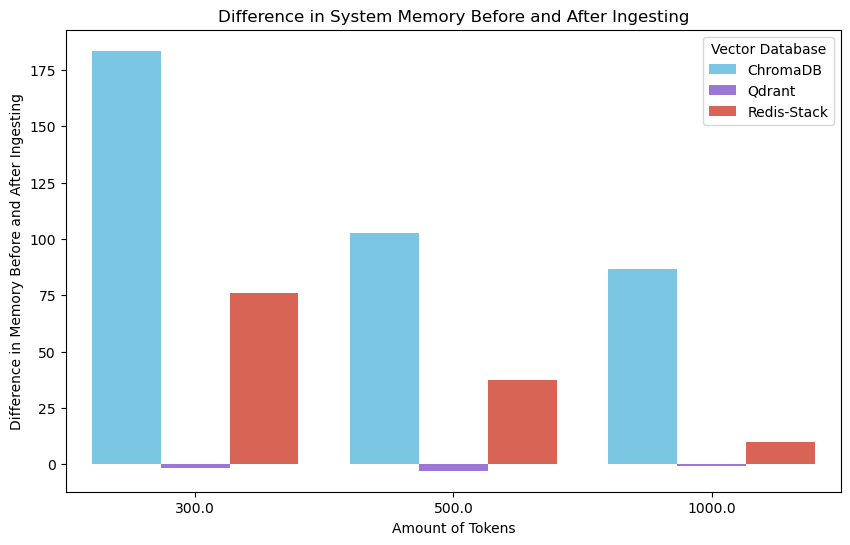

In [ ]:
# group df by vector database and token. Take the average of memory change
df_memory = df.groupby(['Vector Database', 'Tokens'], as_index=False)['memory_effect'].mean()

# plot figure
plt.figure(figsize=(10, 6))
sns.barplot(data=df_memory, x='Tokens', y='memory_effect', hue='Vector Database', palette=custom_palette)

plt.title('Difference in System Memory Before and After Ingesting')
plt.xlabel('Amount of Tokens')
plt.ylabel('Difference in Memory Before and After Ingesting')

plt.show()

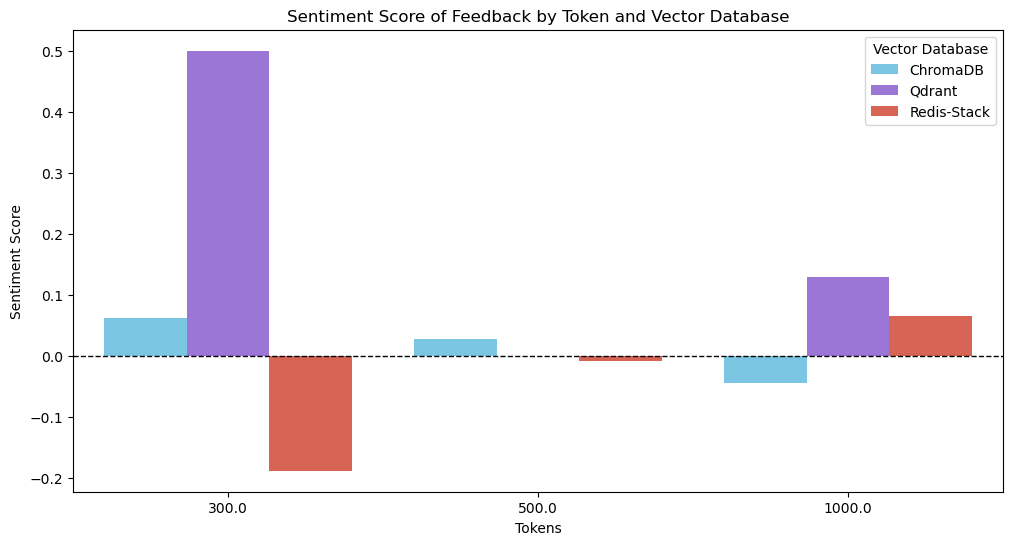

In [ ]:
from textblob import TextBlob

# group df by vector database and token with responses
df['Response Quality/Notes'] = df['Response Quality/Notes'].astype(str)
df_sentiment = df.groupby(['Vector Database', 'Tokens'])['Response Quality/Notes'].apply(lambda x: ' '.join(x)).reset_index()

# calculate sentiment score
df_sentiment['Sentiment Score'] = df_sentiment['Response Quality/Notes'].apply(lambda text: TextBlob(text).sentiment.polarity)

# plot figure
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sentiment, x='Tokens', y='Sentiment Score', hue='Vector Database', palette=custom_palette)

plt.title('Sentiment Score of Feedback by Token and Vector Database')
plt.xlabel('Tokens')
plt.ylabel('Sentiment Score')
plt.axhline(0, color='black', linewidth=1, linestyle='dashed') 

plt.show()

/Users/carson/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/carson/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


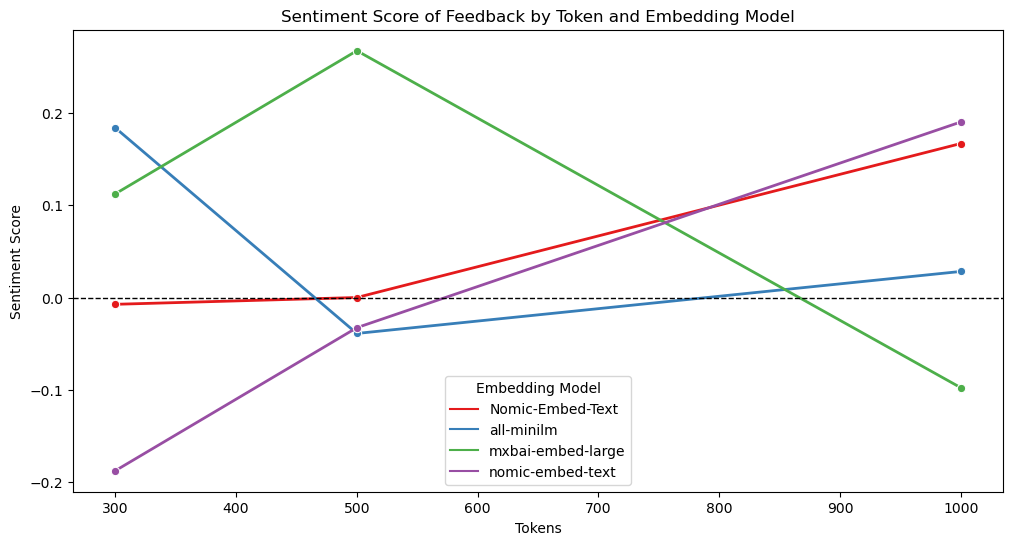

In [ ]:
from textblob import TextBlob

# group df by embedding model and token with responses
df['Response Quality/Notes'] = df['Response Quality/Notes'].astype(str)
df_sentiment = df.groupby(['Embedding Model', 'Tokens'])['Response Quality/Notes'].apply(lambda x: ' '.join(x)).reset_index()

# calculate sentiment score
df_sentiment['Sentiment Score'] = df_sentiment['Response Quality/Notes'].apply(lambda text: TextBlob(text).sentiment.polarity)

# plot figure
plt.figure(figsize=(12, 6))

sns.lineplot(data=df_sentiment, x='Tokens', y='Sentiment Score', hue='Embedding Model', marker='o', linewidth=2)

plt.title('Sentiment Score of Feedback by Token and Embedding Model')
plt.xlabel('Tokens')
plt.ylabel('Sentiment Score')
plt.axhline(0, color='black', linewidth=1, linestyle='dashed') 

plt.show()